In [97]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

# Excel data as pandas dataframe
#filepath = r'C:\Users\Agni\Documents\MIT 2017-18\6.884\neuro-soc\Data\neuro_dataset.xlsx'
filepath = r'C:\Users\Agni\Documents\MIT 2017-18\6.884\neuro-soc\Data\neuro_compiled.xlsx'
df_original = pd.read_excel(filepath, sheetname=0)
#print(df_original)
#print(df_original['Hospital Type (DH)'])

In [98]:
# Categorical to numerical dataframe (contains only the originally categorical columns)
categorical_cols_df = df_original[['Time Zone', 'State', 'SEX', 'Service Line', 'Reason for Consult', 'Provider Diagnosis', 'Hospital Type (DH)', 'Stroke Center',  'Advanced Comprehensive Stroke Center']].copy()
#print(categorical_cols_df)

categorical_numerical_df = categorical_cols_df.apply(lambda x: pd.factorize(x)[0])
#print(categorical_numerical_df)

In [99]:
# COMPLETE INPUT DATAFRAME
# Input features (numerical cols from originally categorical ones, also originally numerical ones)
# ['Visit Initiated', 'Age', 'Bed Count', 'Total ER Visits (DH)']

all_inputs_df = categorical_numerical_df.copy()
all_inputs_df['Visit Initiated'] = df_original['Visit Initiated']
all_inputs_df['Age'] = df_original['Age']
all_inputs_df['Bed Count'] = df_original['Bed Count']
all_inputs_df['Total ER Visits (DH)'] = df_original['Total ER Visits (DH)']

all_inputs_df['Visit Initiated (Float)'] = df_original['Visit Initiated (Float)']

print(all_inputs_df)

       Time Zone  State  SEX  Service Line  Reason for Consult  \
0              0      0    0             0                  -1   
1              0      1    0             0                  -1   
2              1      2    0             0                  -1   
3              2      3    1             0                  -1   
4              2      3    0             0                  -1   
5              0      0    1             1                  -1   
6              1      4    1             1                  -1   
7              2      3    1             0                  -1   
8              2      3    1             0                  -1   
9              0      5    0             1                  -1   
10             2      3    1             0                  -1   
11             1      6    1             1                  -1   
12             2      3    0             1                  -1   
13             2      3    0             0                  -1   
14        

In [100]:
# GENERATING y COLUMN (with 136 entries for 136 weeks)
# New dataframe with demand quantity (by week) column

df = df_original.copy() # for weekly examination
df['Name'] = 'Patient'
df['Quantity'] = 1
df['Visit Initiated'] = pd.to_datetime(df['Visit Initiated']) - pd.to_timedelta(7, unit='d')
df = df.groupby(['Name', pd.Grouper(key='Visit Initiated', freq='W-MON')])['Quantity'].sum().reset_index().sort_values('Visit Initiated')
df['date_delta'] = (df['Visit Initiated'] - df['Visit Initiated'].min())  / np.timedelta64(1,'D')

#quantity_df = df['date_delta']
quantity_df = df.filter(['Quantity'], axis=1)
#print(quantity_df)

In [101]:
# GENERATING complete y COLUMN with script 

def populate(df_input, col):
    """ 
    df_input: input dataframe
    col: string name of the column aggregating
    """
    df = df_input.copy() # don't modify original
    a = df[col].values.T.tolist()
    b = []
    for item in a:
        item = int(item)
        for i in range(item):
            b.append(item)
    # convert b back into a DataFrame
    df_output = pd.DataFrame(b, columns = list(df.columns.values))
    return df_output

quantity_df_extended = populate(quantity_df, 'Quantity')
#print(quantity_df_extended)

In [114]:
#y = df['Quantity'].copy()
#y = df_original
#print(y.shape)

#print(all_inputs_df) #95256 rows x 14 columns
#print(quantity_df_extended) #95256 rows x 1 columns

combined_df = pd.concat([all_inputs_df, quantity_df_extended], axis=1)
#print(combined_df) #95256 rows x 15 columns

new_all_inputs = (combined_df.dropna(axis=0, how='any')).drop(['Visit Initiated'], axis=1)
#print(new_all_inputs)

y = new_all_inputs['Quantity']
x_inputs = new_all_inputs.drop(['Quantity'], axis=1)

# Create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x_inputs, y, test_size=0.2)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

print("---------------------------")
print("X_train:", X_train)
#print("y_train:", y_train)
#print("X_test:", X_test)
#print("y_test:", y_test)

---------------------------
X_train:        Time Zone  State  SEX  Service Line  Reason for Consult  \
60243          1      4    0             1                  74   
41756          1      8    1             1                  81   
63110          0     15    1             1                  78   
79451          1      2    0             1                  74   
67042          0     21    1             1                   5   
36538          1      5    0             1                  74   
45041          4     12    1             1                  74   
45173          3      0    0             1                  74   
44464          1      7    1             0                   4   
43346          0      0    1             0                   5   
95106          1      8    1             1                   7   
84822          0      0    1             1                  75   
89254          1     16    1             1                  74   
85776          1      8    0           

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print(predictions[0:5])

print("Score:", model.score(X_test, y_test))

## The line / model
#plt.scatter(y_test, predictions)
#plt.xlabel("True Values")
#plt.ylabel("Predictions")

[ 812.5328585   805.59873349  805.59873349  798.66460847  808.37238349]
Score: 0.00109661881557


In [172]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

ValueError: Found input variables with inconsistent numbers of samples: [50, 64979]

In [173]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print(predictions[0:5])

print("Score:", model.score(X_test, y_test))

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Cross-validation (to be entered below)

[ 872.71538673  737.225061    951.89534076  908.86582759  901.94603817]
Score: 0.782112663466


In [ ]:

#print(all_inputs_df.drop(['Visit Initiated']))

In [127]:
# ONLY PROVIDER DIAGNOSIS

combined_df = pd.concat([all_inputs_df, quantity_df_extended], axis=1)
#print(combined_df) #95256 rows x 15 columns

new_all_inputs = (combined_df.dropna(axis=0, how='any')).drop(['Visit Initiated'], axis=1)
#print(new_all_inputs)

y = new_all_inputs['Quantity']
x_inputs = new_all_inputs.drop(['Quantity'], axis=1)

# TOGGLE ---------------------------------------------------------
#x_inputs = new_all_inputs.filter(['Provider Diagnosis','Time Zone','Visit Initiated (Float)'], axis=1)
#x_inputs = new_all_inputs.filter(['Reason for Consult','Time Zone','Visit Initiated (Float)'], axis=1)
#x_inputs = new_all_inputs.filter(['Service Line','Time Zone','Visit Initiated (Float)'], axis=1)
#x_inputs = new_all_inputs.filter(['Provider Diagnosis', 'Reason for Consult', 'Time Zone','Visit Initiated (Float)'], axis=1)

# Create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x_inputs, y, test_size=0.2)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print(predictions[0:5])

print("Score:", model.score(X_test, y_test))

[ 817.82622693  821.55929681  723.97296247  768.62772344  727.51801378]
Score: 0.787327485356


In [132]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

combined_df = pd.concat([all_inputs_df, quantity_df_extended], axis=1)
#print(combined_df) #95256 rows x 15 columns

new_all_inputs = (combined_df.dropna(axis=0, how='any')).drop(['Visit Initiated'], axis=1)
#print(new_all_inputs)

y = new_all_inputs['Quantity']
x_inputs = new_all_inputs.drop(['Quantity'], axis=1)

# TOGGLE ---------------------------------------------------------
#x_inputs = new_all_inputs.filter(['Provider Diagnosis','Time Zone','Visit Initiated (Float)'], axis=1)
#x_inputs = new_all_inputs.filter(['Reason for Consult','Time Zone','Visit Initiated (Float)'], axis=1)
#x_inputs = new_all_inputs.filter(['Service Line','Time Zone','Visit Initiated (Float)'], axis=1)
#x_inputs = new_all_inputs.filter(['Provider Diagnosis', 'Reason for Consult', 'Time Zone','Visit Initiated (Float)'], axis=1)

# Create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x_inputs, y, test_size=0.2)

model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

print("CONFUSION MATRIX----------------")
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

# check the accuracy on the training set
#print("Logistic regression score:", model.score(X_test, y_test))

0.0403200984918


ValueError: multiclass format is not supported

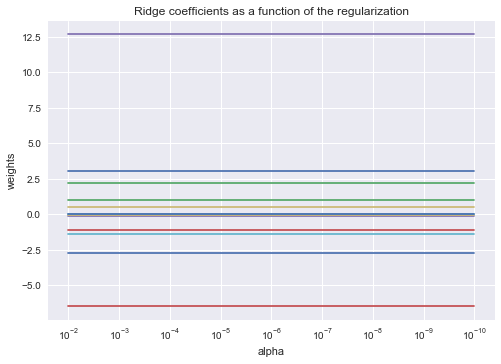

In [175]:
# LASSO REGRESSION

combined_df = pd.concat([all_inputs_df, quantity_df_extended], axis=1)
#print(combined_df) #95256 rows x 15 columns

new_all_inputs = (combined_df.dropna(axis=0, how='any')).drop(['Visit Initiated'], axis=1)
#print(new_all_inputs)

y = new_all_inputs['Quantity']
x_inputs = new_all_inputs.drop(['Quantity'], axis=1)

# TOGGLE ---------------------------------------------------------
#x_inputs = new_all_inputs.filter(['Provider Diagnosis','Time Zone','Visit Initiated (Float)'], axis=1)
#x_inputs = new_all_inputs.filter(['Reason for Consult','Time Zone','Visit Initiated (Float)'], axis=1)
#x_inputs = new_all_inputs.filter(['Service Line','Time Zone','Visit Initiated (Float)'], axis=1)
#x_inputs = new_all_inputs.filter(['Provider Diagnosis', 'Reason for Consult', 'Time Zone','Visit Initiated (Float)'], axis=1)

# Create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x_inputs, y, test_size=0.2)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)


#lm = linear_model.Lasso(alpha=0.1)
#lm = linear_model.LassoCV()
lm = linear_model.Ridge()
#lm = linear_model.SGDRegressor()

#model = lm.fit(X_train, y_train)
#predictions = lm.predict(X_test)

#print(predictions[0:5])

#print("Score:", model.score(X_test, y_test))

# FOR Ridge Regression
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

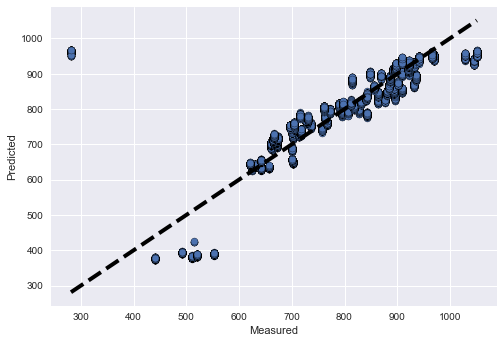

In [148]:
# LINEAR REGRESSION PLOT
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

combined_df = pd.concat([all_inputs_df, quantity_df_extended], axis=1)
#print(combined_df) #95256 rows x 15 columns

new_all_inputs = (combined_df.dropna(axis=0, how='any')).drop(['Visit Initiated'], axis=1)
#print(new_all_inputs)

y = new_all_inputs['Quantity']
x_inputs = new_all_inputs.drop(['Quantity'], axis=1)

# Create training and testing vars
#X_train, X_test, y_train, y_test = train_test_split(x_inputs, y, test_size=0.2)

lr = linear_model.LinearRegression()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, x_inputs, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()